### Example 1
Creating a Simple QR Code with a Link:

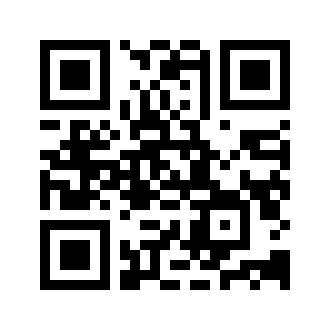

In [91]:
import qrcode

# Create a QR code object
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)

# Add data to the QR code
qr.add_data('https://t.me/DataMasterMind')
qr.make(fit=True)

# Create an image from the QR code object
img = qr.make_image(fill_color="black", back_color="white")

# Save the image
img.save('./QR_Codes/Ex-1-qrcode.png')

display(img)

### Example 2
Creating a Simple QR Code with a Link on the Background Image:

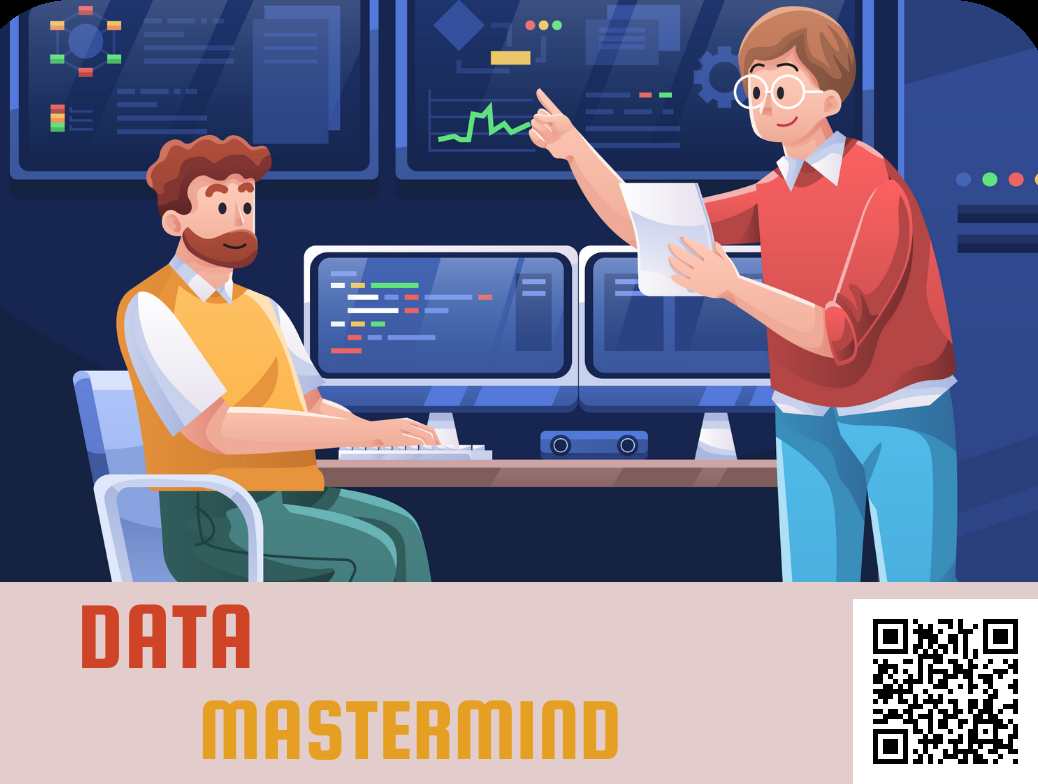

In [110]:
import qrcode
from PIL import Image
from IPython.display import display


# Open the background image
img_bg = Image.open('./Logos/logo-1.png')

# Create a QR code object
qr = qrcode.QRCode(box_size=5)
qr.add_data('https://t.me/DataMasterMind')
qr.make()

# Create an image from the QR code object
img_qr = qr.make_image()

# Calculate the position to paste the QR code on the background image
pos = (img_bg.size[0] - img_qr.size[0], img_bg.size[1] - img_qr.size[1])

# Paste the QR code on the background image
img_bg.paste(img_qr, pos)

# Save the resulting image
img_bg.save('./QR_Codes/Ex-2-qrc-with-background.png')

rgb_img = img_bg.convert('RGB')

display(rgb_img)

### Example 3
Creating a Simple QR Code with a Link on the Background Image:

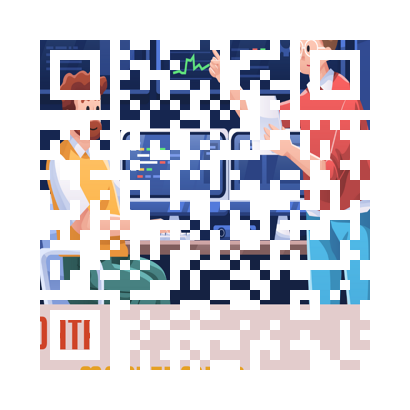

In [111]:
import qrcode
import PIL
from qrcode.image.styledpil import StyledPilImage
from qrcode.image.styles.moduledrawers import SquareModuleDrawer, RoundedModuleDrawer
from qrcode.image.styles.colormasks import ImageColorMask
from PIL import Image, ImageDraw

# Ensure that Resampling attribute is recognized in the PIL Image module
if not hasattr(Image, 'Resampling'):
    Image.Resampling = Image

# Create a QR code object with specific version and error correction level
qr = qrcode.QRCode(version=1, error_correction=qrcode.constants.ERROR_CORRECT_H)

# Add data (URL) to the QR code
qr.add_data('https://t.me/DataMasterMind')

# Generate a QR code image with a styled color mask using StyledPilImage
qr_img = qr.make_image(image_factory=StyledPilImage,
                       color_mask=ImageColorMask(color_mask_path='./Logos/logo-1.png'))

# Display or save the generated QR code image
qr_img.save('./QR_Codes/Ex-3-colormask-qrcode.png')
display(qr_img)


### Example 4
Generating a QR Code with a Logo Overlay:

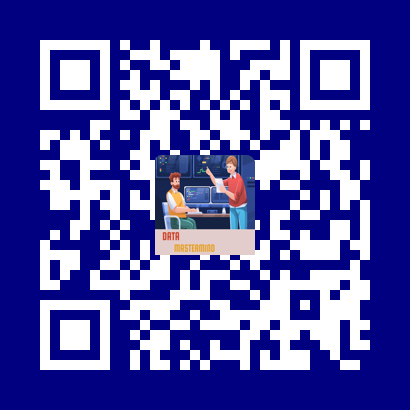

In [112]:
import qrcode
from PIL import Image
from IPython.display import display  # For displaying images in the notebook

# Open and resize the logo image
logo_path = './Logos/logo-1.png'
logo = Image.open(logo_path)
logo = logo.resize((100, 100))  # Resize the logo as needed

# Create a QR code instance
qr = qrcode.QRCode(
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)

# Add data to the QR code
data = 'https://t.me/DataMasterMind'
qr.add_data(data)
qr.make(fit=True)

# Generate the QR code image
qr_code_img = qr.make_image(fill_color="white", back_color="navy")

# Calculate the position to overlay the logo in the center
qr_width, qr_height = qr_code_img.size
logo_width, logo_height = logo.size
position = ((qr_width - logo_width) // 2, (qr_height - logo_height) // 2)

# Paste the logo onto the QR code with transparency
qr_code_img.paste(logo, position, logo)

# Save the final QR code with the logo
output_path = './QR_Codes/Ex-4-qr_code_with_logo.png'
qr_code_img.save(output_path)

# Display the final QR code with the logo in the notebook
display(qr_code_img)


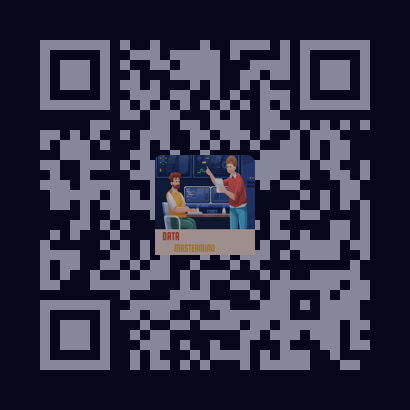

In [113]:
import qrcode
from PIL import Image, ImageChops, ImageEnhance

# Open and resize the logo image
logo_path = './Logos/logo-1.png'
logo = Image.open(logo_path)
logo = logo.resize((100, 100))  # Resize the logo as needed

# Create a QR code instance
qr = qrcode.QRCode(
    error_correction=qrcode.constants.ERROR_CORRECT_H,
    box_size=10,
    border=4,
)

# Add data to the QR code
data = 'https://t.me/DataMasterMind'
qr.add_data(data)
qr.make(fit=True)

# Generate the QR code image
qr_code_img = qr.make_image(fill_color="white", back_color="black")

# Create a gradient background
gradient = Image.new('RGB', qr_code_img.size, (17, 13, 53))  # Gradient color

# Blend the QR code image with the gradient background
blended_image = ImageChops.blend(gradient, qr_code_img, alpha=0.5)  # Adjust alpha value

# Adjust the transparency of the logo
logo_with_transparency = logo.copy()
enhancer = ImageEnhance.Brightness(logo_with_transparency)
logo_with_transparency = enhancer.enhance(0.7)  # Adjust transparency

# Calculate the position to overlay the logo in the center
qr_width, qr_height = qr_code_img.size
logo_width, logo_height = logo_with_transparency.size
position = ((qr_width - logo_width) // 2, (qr_height - logo_height) // 2)

# Paste the logo onto the blended image
blended_image.paste(logo_with_transparency, position, logo_with_transparency)

# Save the final QR code with the logo and custom style
output_path = './QR_Codes/Ex-5-custom_styled_qr_code.png'
blended_image.save(output_path)

display(blended_image)

